In [33]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cmap = 'jet'

(30, 30) min, max:  15.39249121 18.72840672


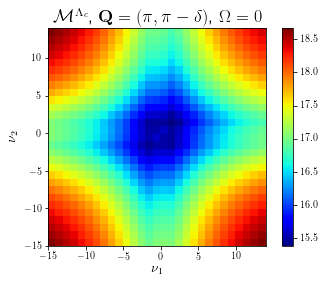

In [29]:
    plt.clf()

    matriciona = np.loadtxt('./Phi_mag.txt')

    center = matriciona.shape[0]/2
    print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = np.arange(-matriciona.shape[0]/2, matriciona.shape[0]/2)
   
    plt.pcolormesh(x,x,matriciona[:],cmap=cmap)
    plt.colorbar(orientation= "vertical")
 
    plt.xlim([x[0],x[-1]])
    plt.ylim([x[0],x[-1]])

    plt.xlabel(r'$\nu_1$', fontsize=14)
    plt.ylabel(r'$\nu_2$', fontsize=14)
    plt.gca().set_aspect(1)
    
    plt.title(r'$\mathcal{M}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(\pi,\pi-\delta)$, $\Omega=0$', fontsize=18)
    #plt.savefig('Phi_mag.png',dpi=300)

(30, 30) min, max:  -125.00753604 -5.57281919


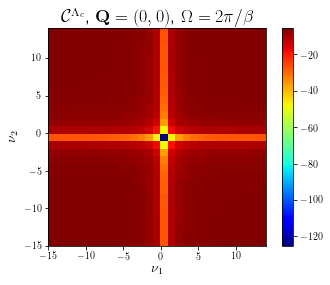

In [30]:
    plt.clf()

    matriciona = np.loadtxt('./Phi_den.txt')

    center = matriciona.shape[0]/2
    print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = np.arange(-matriciona.shape[0]/2, matriciona.shape[0]/2)
   
    plt.pcolormesh(x,x,matriciona[:],cmap=cmap)
    plt.colorbar(orientation= "vertical")
 
    plt.xlim([x[0],x[-1]])
    plt.ylim([x[0],x[-1]])

    plt.xlabel(r'$\nu_1$', fontsize=14)
    plt.ylabel(r'$\nu_2$', fontsize=14)
    plt.gca().set_aspect(1)
    
    plt.title(r'$\mathcal{C}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(0,0)$, $\Omega=2\pi/\beta$', fontsize=18)
    #plt.savefig('Phi_den.png')

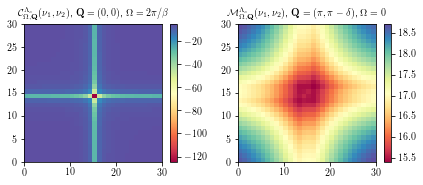

In [36]:
plt.clf()

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z1 = np.loadtxt('../data/Phi_mag.txt')
z2 = np.loadtxt('../data/Phi_den.txt')
#levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('Spectral')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax1, ax0) = plt.subplots(ncols=2)

im = ax0.pcolormesh(z1, cmap=cmap)
fig.colorbar(im, ax=ax0, shrink=0.52)
ax0.set_title(r'$\mathcal{M}^{\mathrm{\Lambda}_c}_{\Omega,\mathbf{Q}}(\nu_1,\nu_2)$, $\mathbf{Q}=(\pi,\pi-\delta)$' 
              +r', $\Omega=0$', fontsize=10)
ax0.set_aspect(1)


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.pcolormesh(z2, cmap=cmap)
fig.colorbar(cf, ax=ax1, shrink=0.52)
ax1.set_title(r'$\mathcal{C}^{\mathrm{\Lambda}_c}_{\Omega,\mathbf{Q}}(\nu_1,\nu_2)$, $\mathbf{Q}=(0,0)$' 
              +r', $\Omega=2\pi / \beta$', fontsize=10)
ax1.set_aspect(1)

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()
plt.savefig('../images/jup_Phi_color.png',dpi=300)